<a href="https://colab.research.google.com/github/trifarameliniaa/SKRIPSI/blob/main/Skripsi_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [4]:
from PIL import Image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

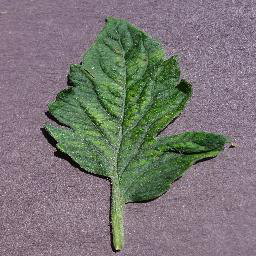

In [3]:
img = Image.open('/content/Tomato_Tomato_mosaic_virus15.jpg')
img

In [5]:
img.size

(256, 256)

In [6]:
img_array = np.array(img)
img_array

array([[[146, 127, 146],
        [140, 121, 140],
        [135, 116, 135],
        ...,
        [125, 110, 129],
        [160, 145, 164],
        [148, 133, 152]],

       [[140, 121, 140],
        [145, 126, 145],
        [147, 128, 147],
        ...,
        [118, 103, 122],
        [139, 124, 143],
        [140, 125, 144]],

       [[139, 120, 139],
        [135, 116, 135],
        [131, 112, 131],
        ...,
        [130, 115, 134],
        [146, 131, 150],
        [146, 131, 150]],

       ...,

       [[154, 134, 146],
        [116,  96, 108],
        [150, 130, 142],
        ...,
        [135, 117, 133],
        [134, 116, 132],
        [132, 114, 130]],

       [[118,  98, 110],
        [138, 118, 130],
        [135, 115, 127],
        ...,
        [129, 111, 127],
        [128, 110, 126],
        [128, 110, 126]],

       [[107,  87,  99],
        [119,  99, 111],
        [155, 135, 147],
        ...,
        [140, 122, 138],
        [141, 123, 139],
        [145, 127, 143]]

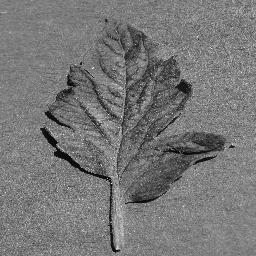

In [7]:
imgGray = img.convert('L')
imgGray.save('test_gray.jpg')
imgGray

In [8]:
imgG_array = np.array(imgGray)
imgG_array

array([[135, 129, 124, ..., 117, 152, 140],
       [129, 134, 136, ..., 110, 131, 132],
       [128, 124, 120, ..., 122, 138, 138],
       ...,
       [141, 103, 137, ..., 124, 123, 121],
       [105, 125, 122, ..., 118, 117, 117],
       [ 94, 106, 142, ..., 129, 130, 134]], dtype=uint8)

## FIS (Fuzzy Information System)

In [9]:
# Representasi derajat keanggotan menggunakan kurva segitiga
def kurva_segitiga(cls, name, domain_min, domain_max, res, a, b, c):
  t1fs = cls(name, domain_min, domain_max, res)

  a = t1fs._adjust_domain_val(a)
  b = t1fs._adjust_domain_val(b)
  c = t1fs._adjust_domain_val(c)

  t1fs._dom = np.round(np.maximum(np.minimum((t1fs._domain-a)/(b-a), (c-t1fs._domain)/(c-b)), 0), t1fs._precision)


In [10]:
# Fuzzy Information Gain
def entropy(im):
    # normalisasi -> p(g)
    p = np.array([(im==v).sum() for v in range(256)])
    p = p/p.sum()
    # menghitung e = -sum(p(g)*log2(p(g)))
    e = -(p[p>0]*np.log2(p[p>0])).sum()
    
    return e

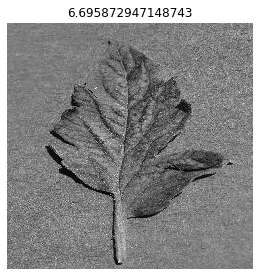

In [13]:
from skimage.io import imread,imshow,imsave
im = imread('/content/test_gray.jpg')

plt.figure()
imshow(im)
plt.axis('off')
plt.title(entropy(im))
plt.show()

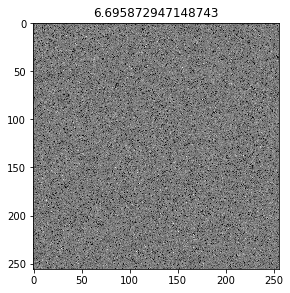

In [15]:
im_shuf = im.copy().flatten()
np.random.shuffle(im_shuf)
im_shuf = im_shuf.reshape(im.shape)

plt.figure()
imshow(im_shuf)
plt.title(entropy(im_shuf))
plt.show()

## K-Means Klastering

In [23]:
pixel_vals = im.reshape((-1,2))
print(pixel_vals.dtype, pixel_vals.shape)

uint8 (32768, 2)


In [24]:
Z = np.float32(pixel_vals)
print(Z.dtype, Z.shape)

float32 (32768, 2)


In [25]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
print(label)

[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [26]:
print(center)

[[ 76.86736  76.70479]
 [128.3469  128.28894]]


In [27]:
# back convert data into integer 8-bit values

center = np.uint8(center)
center

array([[ 76,  76],
       [128, 128]], dtype=uint8)

In [28]:
segmented_data = center[label.flatten()]
segmented_data

array([[128, 128],
       [128, 128],
       [128, 128],
       ...,
       [128, 128],
       [128, 128],
       [128, 128]], dtype=uint8)

In [29]:
segmented_image = segmented_data.reshape((im.shape))
segmented_image

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ...,
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [ 76,  76, 128, ..., 128, 128, 128]], dtype=uint8)

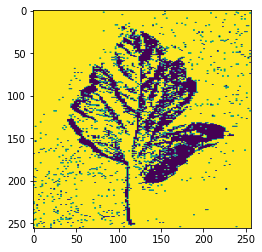

In [30]:
# visualize the segmented image

plt.imshow(segmented_image)